In [4]:
# !pip install --pre pycaret

In [5]:
# !pip install pyarrow

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Capstone/data.csv')
df.to_parquet('Data.parquet')
df = pd.read_parquet('/content/Data.parquet')
del df['Unnamed: 0']
df['town'] = df.town.astype('category')
df['flat_type'] = df.flat_type.astype('category')
df['storey_range'] = df.storey_range.astype('category')
df['age_of_flat'] = df.age_of_flat.astype('int8')
df['resale_price'] = df.resale_price.astype('float32')
df['lease_commence_date'] = df.lease_commence_date.astype('int16')
df.head()

,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,town,age_of_flat,price_per_square_meter
0,2 ROOM,10 TO 12,44.0,Improved,1979,232000.0,ANG MO KIO,44,5272.727273
1,3 ROOM,01 TO 03,67.0,New Generation,1978,250000.0,ANG MO KIO,45,3731.343284
2,3 ROOM,01 TO 03,67.0,New Generation,1980,262000.0,ANG MO KIO,43,3910.447761
3,3 ROOM,04 TO 06,68.0,New Generation,1980,265000.0,ANG MO KIO,43,3897.058824
4,3 ROOM,01 TO 03,67.0,New Generation,1980,265000.0,ANG MO KIO,43,3955.223881


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164355 entries, 0 to 164354
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   flat_type               164355 non-null  category
 1   storey_range            164355 non-null  category
 2   floor_area_sqm          164355 non-null  float64 
 3   flat_model              164355 non-null  object  
 4   lease_commence_date     164355 non-null  int16   
 5   resale_price            164355 non-null  float32 
 6   town                    164355 non-null  category
 7   age_of_flat             164355 non-null  int8    
 8   price_per_square_meter  164355 non-null  float64 
dtypes: category(3), float32(1), float64(2), int16(1), int8(1), object(1)
memory usage: 5.3+ MB


In [9]:
from pycaret.regression import *
reg = setup(df, target = 'resale_price',
            ignore_features = ['price_per_square_meter'],
            session_id = 123,
            normalize = True, #normalisation helps some algorithms
            normalize_method = 'robust', #resilient to outliers
            transform_target = True, #applies transformation to target column
            data_split_shuffle = False, #so that we do not use "future" observations to predict "past" observations
#             create_clusters = True,
#             feature_interaction = True,
            use_gpu = False,
#             silent = True,
            n_jobs = -1)

,Description,Value
0,Session id,123
1,Target,resale_price
2,Target type,Regression
3,Original data shape,"(164355, 9)"
4,Transformed data shape,"(164355, 48)"
5,Transformed train set shape,"(115048, 48)"
6,Transformed test set shape,"(49307, 48)"
7,Ignore features,1
8,Numeric features,3
9,Categorical features,4


In [10]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,30207.3191,1649158134.9847,39563.7063,0.9317,0.0877,0.0684,37.7600
et,Extra Trees Regressor,30843.3014,1747981484.4624,40786.2853,0.9276,0.0898,0.0697,38.2240
xgboost,Extreme Gradient Boosting,31897.2322,1803152000.0000,41553.4895,0.9253,0.0899,0.0713,3.1390
dt,Decision Tree Regressor,31363.4562,1838991899.8239,41976.1212,0.9237,0.0916,0.0707,1.5740
lightgbm,Light Gradient Boosting Machine,34907.6836,2153034471.5816,45579.7107,0.9107,0.0966,0.0772,3.6500
knn,K Neighbors Regressor,34885.3049,2537309107.2000,49231.5805,0.8951,0.1024,0.0763,12.3690
gbr,Gradient Boosting Regressor,47222.4542,4369921885.6446,65599.8150,0.8181,0.1288,0.1003,16.6420
ridge,Ridge Regression,60802.2317,7132283177.3498,84094.8023,0.7025,0.1631,0.1272,1.5400
br,Bayesian Ridge,60802.3168,7132415548.3659,84095.6535,0.7025,0.1631,0.1272,1.7220
lr,Linear Regression,60820.5872,7135514182.7497,84112.7062,0.7023,0.1631,0.1273,2.3870


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [13]:
print(best)

RandomForestRegressor(n_jobs=-1, random_state=123)


In [12]:
rfr = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,26988.5974,1345876988.2786,36686.1962,0.9367,0.0814,0.0619
1,26564.9501,1307064351.9816,36153.3450,0.9450,0.0776,0.0603
2,26807.3686,1296904397.1750,36012.5589,0.9470,0.0801,0.0632
3,26625.4724,1253634243.3104,35406.6977,0.9466,0.0834,0.0664
4,27680.6368,1347047551.9083,36702.1464,0.9430,0.0865,0.0695
5,26779.4383,1257732117.0893,35464.5191,0.9433,0.0847,0.0675
6,24980.1996,1124091793.7865,33527.4782,0.9526,0.0771,0.0603
7,25392.0874,1211001814.1742,34799.4513,0.9518,0.0721,0.0539
8,35538.7187,2063818398.8826,45429.2681,0.9194,0.0966,0.0730


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
evaluate_model(rfr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

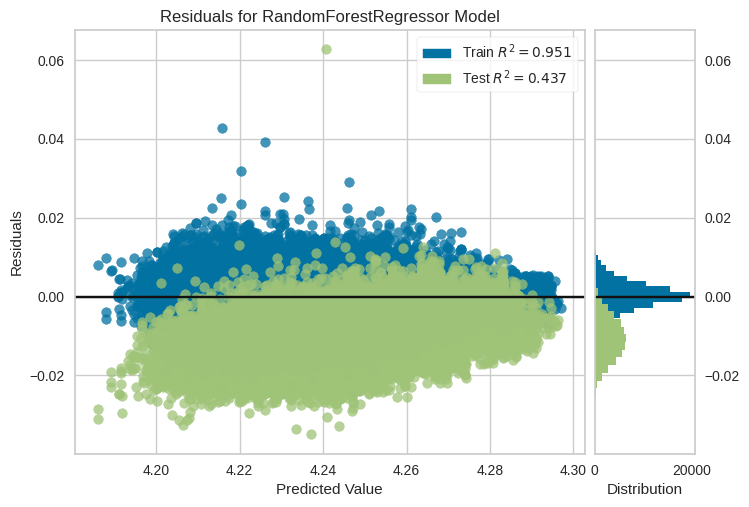

In [18]:
plot_model(best, plot = 'residuals')

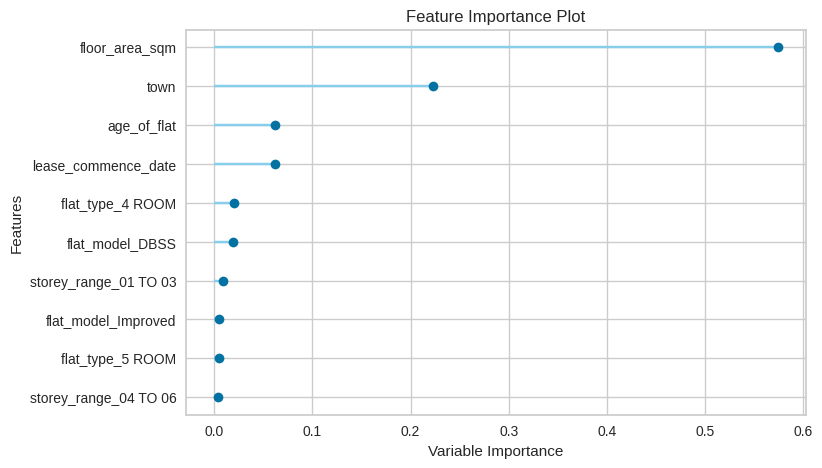

In [16]:
plot_model(rfr, plot = 'feature')

KeyboardInterrupt: ignored

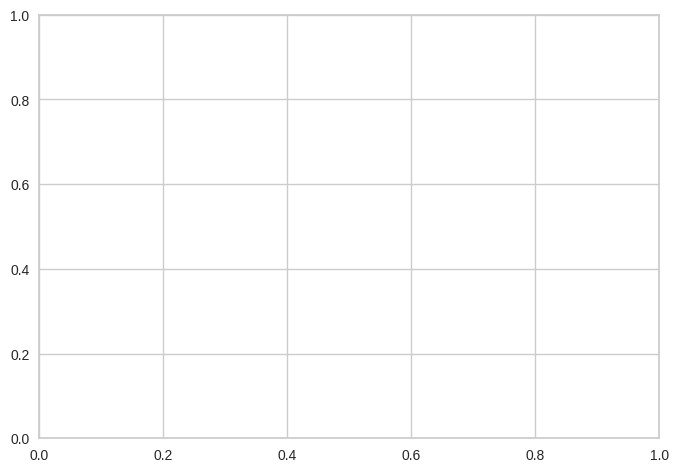

In [20]:
plot_model(rfr, plot = 'learning')

In [21]:
predict_model(rfr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,94419.9617,11515235756.7700,107309.0665,0.6016,0.2144,0.1724


,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,town,age_of_flat,resale_price,prediction_label
115048,5 ROOM,07 TO 09,110.0,Improved,2003,SENGKANG,20,535000.0,469869.075085
115049,5 ROOM,07 TO 09,110.0,Improved,2001,SENGKANG,22,535000.0,465545.940219
115050,5 ROOM,07 TO 09,110.0,Improved,2001,SENGKANG,22,535000.0,465545.940219
115051,5 ROOM,19 TO 21,112.0,Premium Apartment,2004,SENGKANG,19,535000.0,470254.138742
115052,5 ROOM,13 TO 15,116.0,Improved,2000,SENGKANG,23,540000.0,472911.914330
...,...,...,...,...,...,...,...,...,...
164350,EXECUTIVE,04 TO 06,142.0,Apartment,1986,YISHUN,37,715000.0,552701.063921
164351,EXECUTIVE,10 TO 12,142.0,Apartment,1988,YISHUN,35,865000.0,566024.115691
164352,EXECUTIVE,01 TO 03,154.0,Maisonette,1987,YISHUN,36,829000.0,641540.993062
164353,EXECUTIVE,07 TO 09,146.0,Maisonette,1987,YISHUN,36,855000.0,589094.719470


In [22]:
predictions = predict_model(rfr, data=df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,44468.1609,4133871528.9116,64295.1906,0.8532,0.1317,0.0889


,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,town,age_of_flat,price_per_square_meter,resale_price,prediction_label
0,2 ROOM,10 TO 12,44.0,Improved,1979,ANG MO KIO,44,5272.727051,232000.0,223459.390911
1,3 ROOM,01 TO 03,67.0,New Generation,1978,ANG MO KIO,45,3731.343262,250000.0,254436.720582
2,3 ROOM,01 TO 03,67.0,New Generation,1980,ANG MO KIO,43,3910.447754,262000.0,260515.823459
3,3 ROOM,04 TO 06,68.0,New Generation,1980,ANG MO KIO,43,3897.058838,265000.0,281148.859929
4,3 ROOM,01 TO 03,67.0,New Generation,1980,ANG MO KIO,43,3955.223877,265000.0,260515.823459


In [23]:
save_model(rfr, 'RFR_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('target_transformation',
                  TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                 ('numerical_imputer',
                  TransformerWrapper(include=['floor_area_sqm',
                                              'lease_commence_date',
                                              'age_of_flat'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrap...
                                     transformer=OneHotEncoder(cols=['flat_type',
                                                                     'storey_range',
                                                                     'flat_model'],
                                                               handle_missing='return_nan',
                                                               use

In [24]:
loaded_model = load_model('RFR_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('target_transformation',
                 TransformerWrapperWithInverse(transformer=TargetTransformer(estimator=PowerTransformer(standardize=False)))),
                ('numerical_imputer',
                 TransformerWrapper(include=['floor_area_sqm',
                                             'lease_commence_date',
                                             'age_of_flat'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 Tran...
                                    transformer=OneHotEncoder(cols=['flat_type',
                                                                    'storey_range',
                                                                    'flat_model'],
                                                              handle_missing='return_nan',
                          